In [1]:
import pandas as pd

df = pd.read_csv('score_updated.csv')

print(df.head())
print(df.shape)

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
(96, 2)


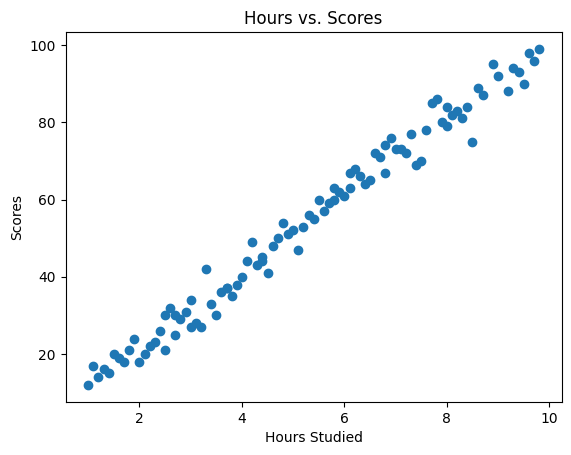

In [2]:
import matplotlib.pyplot as plt

plt.scatter(df['Hours'], df['Scores'])
plt.title('Hours vs. Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

In [3]:
import numpy as np

X = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values.reshape(-1,1)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ols

### Mathematical Explanation of Ordinary Least Squares (OLS)

The OLS method is based on finding the line that minimizes the sum of the squared errors of the model. This process is explained mathematically below.

#### 1. Linear Regression Model

The simple linear regression model is defined as follows, where $h_{\theta}(x)$ is our model or "hypothesis":

$h_{\theta}(x) = \theta_0 + \theta_1 x$

* $\theta_0$: The intercept (first coefficient)
* $\theta_1$: The slope (second coefficient)

#### 2. Cost Function

Our goal is to find the values of $\theta_0$ and $\theta_1$ that minimize the cost function ($J$). This function calculates the mean squared difference between the actual values ($y$) and the values predicted by the model ($h_{\theta}(x)$):

$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 = \frac{1}{2m} \sum_{i=1}^{m} (\theta_0 + \theta_1 x^{(i)} - y^{(i)})^2$

* $m$: The total number of data points
* $x^{(i)}$: The value of the independent variable for the $i$-th data point
* $y^{(i)}$: The actual value of the dependent variable for the $i$-th data point

#### 3. Finding Optimal Parameters with Differentiation

To find the values of $\theta_0$ and $\theta_1$ that minimize the cost function, we use calculus. By taking the partial derivative of the function $J$ with respect to each parameter and setting it to zero, we can find the optimum:

$\frac{\partial J}{\partial \theta_0} = 0$
$\frac{\partial J}{\partial \theta_1} = 0$

By solving these two equations, we arrive at the final OLS formulas for the coefficients.

#### 4. Final Formulas

After solving the equations above, the analytical formulas for $\theta_0$ and $\theta_1$ are obtained:

* **Formula for $\theta_1$ (Slope):**

    $\theta_1 = \frac{m\sum xy - \sum x\sum y}{m\sum x^2 - (\sum x)^2}$

* **Formula for $\theta_0$ (Intercept):**

    $\theta_0 = \bar{y} - \theta_1\bar{x}$

These formulas provide a direct solution for finding the best-fit regression line and do not require iterative processes.

In [5]:
m = len(X_train)
x_mean = np.mean(X_train)
y_mean = np.mean(y_train)

numerator = np.sum((X_train - x_mean) * (y_train - y_mean))
denominator = np.sum((X_train - x_mean)**2)
theta1 = numerator / denominator

theta0 = y_mean - (theta1 * x_mean)
theta0,theta1


(np.float64(2.440565592134071), np.float64(9.835635077805751))

In [6]:
y_pred = theta0 + theta1 * X_test

mse = np.mean((y_pred - y_test)**2)
print(f"(MSE) {mse}")

(MSE) 17.00744425086653


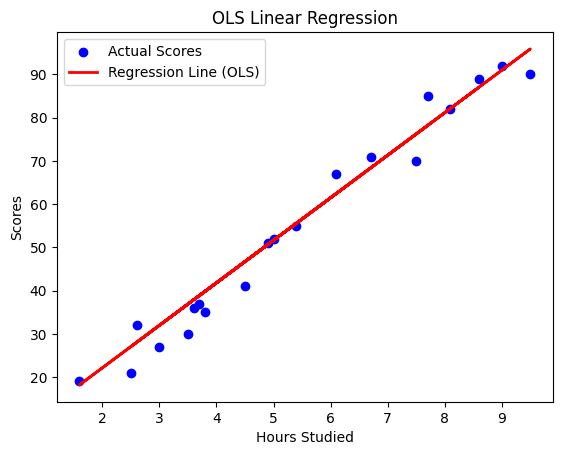

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual Scores')

plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line (OLS)')

plt.title('OLS Linear Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.legend()
plt.show()

Of course. Here is the mathematical explanation for the Gradient Descent algorithm, presented in English, following the same structure.

### Mathematical Explanation of Gradient Descent

Gradient Descent is an iterative optimization algorithm used to find the optimal parameters by moving step-by-step in the opposite direction of the gradient of the cost function.

#### 1. Linear Regression Model

The simple linear regression model, where $h_{\theta}(x)$ is our model or "hypothesis," is defined as:

$h_{\theta}(x) = \theta_0 + \theta_1 x$

* $\theta_0$: The intercept (the first coefficient)
* $\theta_1$: The slope (the second coefficient)

#### 2. Cost Function

Our goal is to find the values of $\theta_0$ and $\theta_1$ that minimize the cost function ($J$). This function calculates the mean squared difference between the actual values ($y$) and the values predicted by the model ($h_{\theta}(x)$):

$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 = \frac{1}{2m} \sum_{i=1}^{m} (\theta_0 + \theta_1 x^{(i)} - y^{(i)})^2$

* $m$: The total number of data points
* $x^{(i)}$: The value of the independent variable for the $i$-th data point
* $y^{(i)}$: The actual value of the dependent variable for the $i$-th data point

#### 3. Finding Optimal Parameters with an Iterative Approach

Unlike OLS, which provides a direct analytical solution, Gradient Descent works iteratively. In each step, we adjust the parameters in the direction that produces the steepest descent in the cost function. This direction is the negative of the gradient. The process is controlled by a "learning rate" ($\alpha$), which determines the size of each step.

The general update rule for each parameter $\theta_j$ is:

$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)$

We repeat this update until the algorithm converges to an optimum (i.e., the changes in the cost function become negligible).

#### 4. Final Formulas (Update Rules)

By calculating the partial derivative of the cost function ($J$) with respect to each parameter, $\theta_0$ and $\theta_1$, we arrive at the following update rules, which must be applied simultaneously in each iteration:

* **Update Rule for $\theta_0$ (Intercept):**

    $\theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})$

* **Update Rule for $\theta_1$ (Slope):**

    $\theta_1 := \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x^{(i)}$

These formulas are the core of the Gradient Descent algorithm for linear regression, allowing us to gradually approach the best-fit line.

In [8]:
learning_rate = 0.01 
iterations = 1500    

theta0 = 0.0
theta1 = 0.0

m = len(y_train)

cost_history = []

for i in range(iterations):
    y_pred = theta0 + theta1 * X_train

    cost = (1 / (2 * m)) * np.sum((y_pred - y_train)**2)
    cost_history.append(cost)

    d_theta1 = (1 / m) * np.sum((y_pred - y_train) * X_train)
    d_theta0 = (1 / m) * np.sum(y_pred - y_train)

    theta0 = theta0 - learning_rate * d_theta0
    theta1 = theta1 - learning_rate * d_theta1

In [9]:
print(f"(theta0): {theta0}")
print(f"(theta1): {theta1}")

y_pred_test = theta0 + theta1 * X_test
mse_test = np.mean((y_pred_test - y_test)**2)
print(f"(MSE)  {mse_test}")


(theta0): 2.3847104351415473
(theta1): 9.84432660513886
(MSE)  16.951631117346615


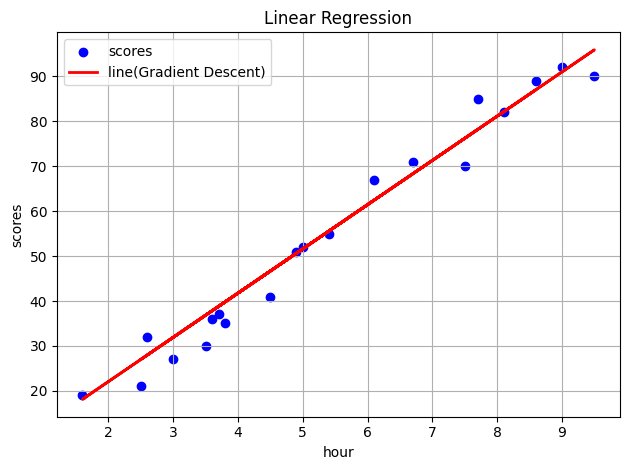

In [10]:
plt.scatter(X_test, y_test, color='blue', label='scores')
plt.plot(X_test, y_pred_test, color='red', linewidth=2, label='line(Gradient Descent)')
plt.title('Linear Regression')
plt.xlabel('hour')
plt.ylabel('scores')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Of course. Here is the mathematical explanation for the **Normal Equation**, presented in English with the same structure.

### Mathematical Explanation of the Normal Equation

The Normal Equation is an analytical approach to finding the optimal coefficients for a linear regression model. Unlike iterative methods like Gradient Descent, it solves for the parameters directly, without the need to choose a learning rate or run multiple iterations.

#### 1. Linear Regression Model

The simple linear regression model, where $h_{\theta}(x)$ is our model or "hypothesis," is defined as:

$h_{\theta}(x) = \theta_0 + \theta_1 x$

* $\theta_0$: The intercept (the first coefficient)
* $\theta_1$: The slope (the second coefficient)

#### 2. Cost Function

Our goal is to find the values of $\theta_0$ and $\theta_1$ that minimize the cost function ($J$). This function calculates the mean squared difference between the actual values ($y$) and the values predicted by the model ($h_{\theta}(x)$):

$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 = \frac{1}{2m} \sum_{i=1}^{m} (\theta_0 + \theta_1 x^{(i)} - y^{(i)})^2$

* $m$: The total number of data points
* $x^{(i)}$: The value of the independent variable for the $i$-th data point
* $y^{(i)}$: The actual value of the dependent variable for the $i$-th data point

#### 3. Finding Optimal Parameters with a Direct Analytical Approach

To minimize the cost function $J$ using calculus, we set its partial derivatives with respect to each parameter ($\theta_0$ and $\theta_1$) equal to zero:

$\frac{\partial J}{\partial \theta_0} = 0 \quad \text{and} \quad \frac{\partial J}{\partial \theta_1} = 0$

The Normal Equation method provides a direct, closed-form solution by solving this system of equations all at once. This is accomplished using linear algebra concepts and a vector representation of the data, eliminating the need for an iterative process.

#### 4. Final Formula (Matrix Form)

By solving the system of equations above, we arrive at a single matrix formula to compute the vector of parameters, $\theta$:

$\theta = (X^T X)^{-1} X^T y$

In this formula:
* $\theta$: Is the vector of model parameters (containing $\theta_0, \theta_1, ...$).
* $X$: Is the **Design Matrix**, which contains the input features. A column of ones is added to this matrix to account for the intercept term ($\theta_0$).
* $y$: Is the vector of target values (the actual values).
* $X^T$: Is the transpose of matrix $X$.
* $(X^T X)^{-1}$: Is the inverse of the matrix product $X^T X$.

This formula calculates the optimal values for $\theta$ that minimize the cost function in a single step.

In [11]:
X_b = np.c_[np.ones((len(X), 1)), X]


theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

print(f"Intercept (theta_0): {theta_best[0]}")
print(f"Slope (theta_1): {theta_best[1]}")


Intercept (theta_0): [1.86357663]
Slope (theta_1): [9.90131826]


In [12]:
X_new = np.array([[0], [10]])  
X_new_b = np.c_[np.ones((2, 1)), X_new] 
y_predict = X_new_b @ theta_best


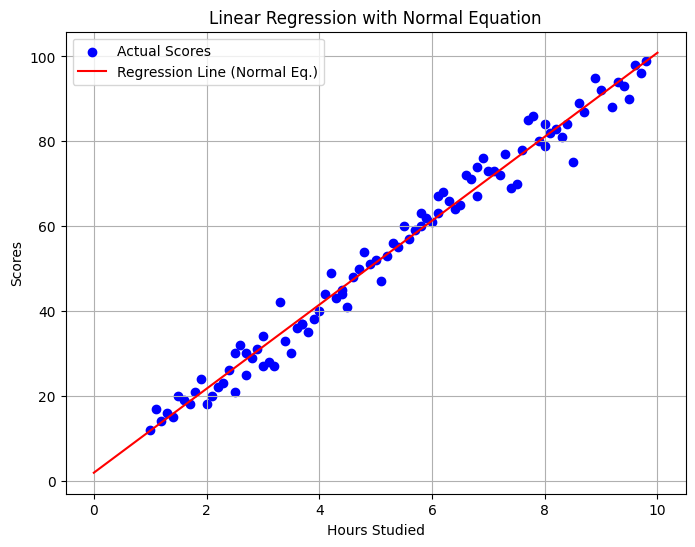

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Scores')
plt.plot(X_new, y_predict, "r-", label="Regression Line (Normal Eq.)")
plt.title('Linear Regression with Normal Equation')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()

### Mathematical Explanation of the LinearRegression from sklearn Library


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

model.fit(X_train, y_train)

intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercept: {intercept}")
print(f"Slope/Coefficient: {slope}")

y_pred = model.predict(X_test)

Intercept: [2.44056559]
Slope/Coefficient: [9.83563508]


In [15]:
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error (MSE) on Test Set: {mse}")



Mean Squared Error (MSE) on Test Set: 17.007444250866516


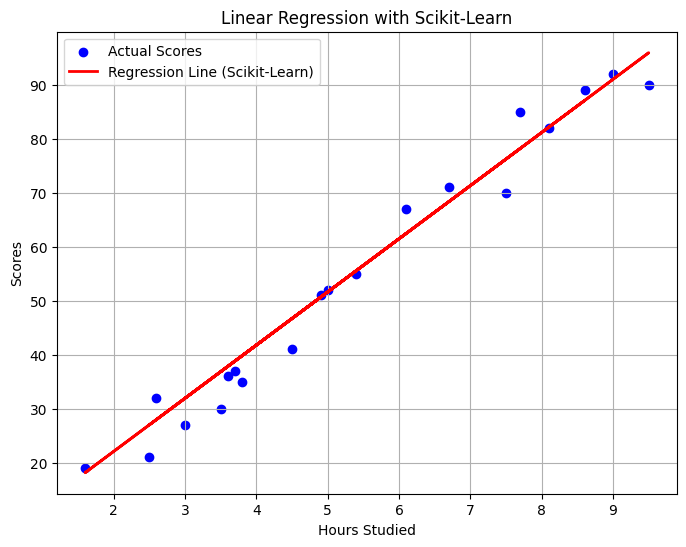

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Scores')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line (Scikit-Learn)')
plt.title('Linear Regression with Scikit-Learn')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()